# Lesson 6
## Random Forest

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Part (a)
### Training the Forest


In [2]:
df=sns.load_dataset('iris')
data=pd.DataFrame(df)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X=data.drop('species',axis=1)
y=data['species']

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [5]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [6]:
print(f"The accuracy of it is {accuracy_score(y_test,prediction)}")

The accuracy of it is 0.9333333333333333


## Part (b)
### Feature Importance (The "Killer Feature")

In [7]:
importance=model.feature_importances_
feature_important_df=pd.DataFrame({
    'Features': X.columns,
    'importance':importance
})
feature_important_df=feature_important_df.sort_values(by='importance',ascending=False)
feature_important_df

,Features,importance
3,petal_width,0.482951
2,petal_length,0.363589
1,sepal_width,0.079849
0,sepal_length,0.073611


C:\Users\EURO COMPUTERS\AppData\Local\Temp\ipykernel_15920\434236526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Features',y='importance',data=feature_important_df,palette='viridis')


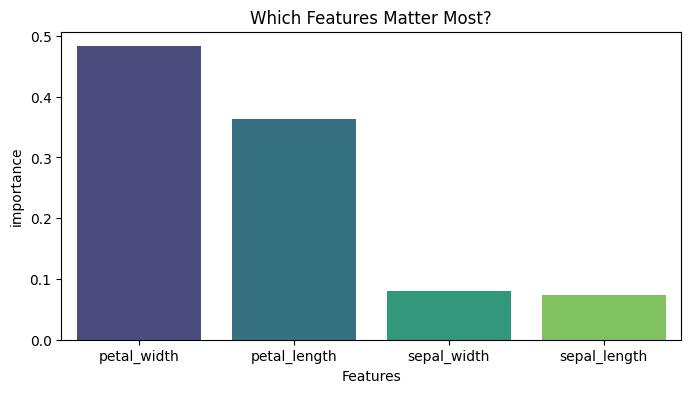

In [8]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Features',y='importance',data=feature_important_df,palette='viridis')
plt.title("Which Features Matter Most?")
plt.show()